In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.datasets import make_moons

dataset = make_moons(n_samples = 1000,
                    noise = 0.5,
                    random_state = 0)
dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1,1))),
                      columns = ['x1', 'x2', 'y'])
dataset.head()

,x1,x2,y
0,2.216430,0.741684,1.0
1,2.057427,0.424853,1.0
2,-0.116847,0.004159,0.0
3,-0.710797,0.210482,1.0
4,0.267548,-0.460654,1.0


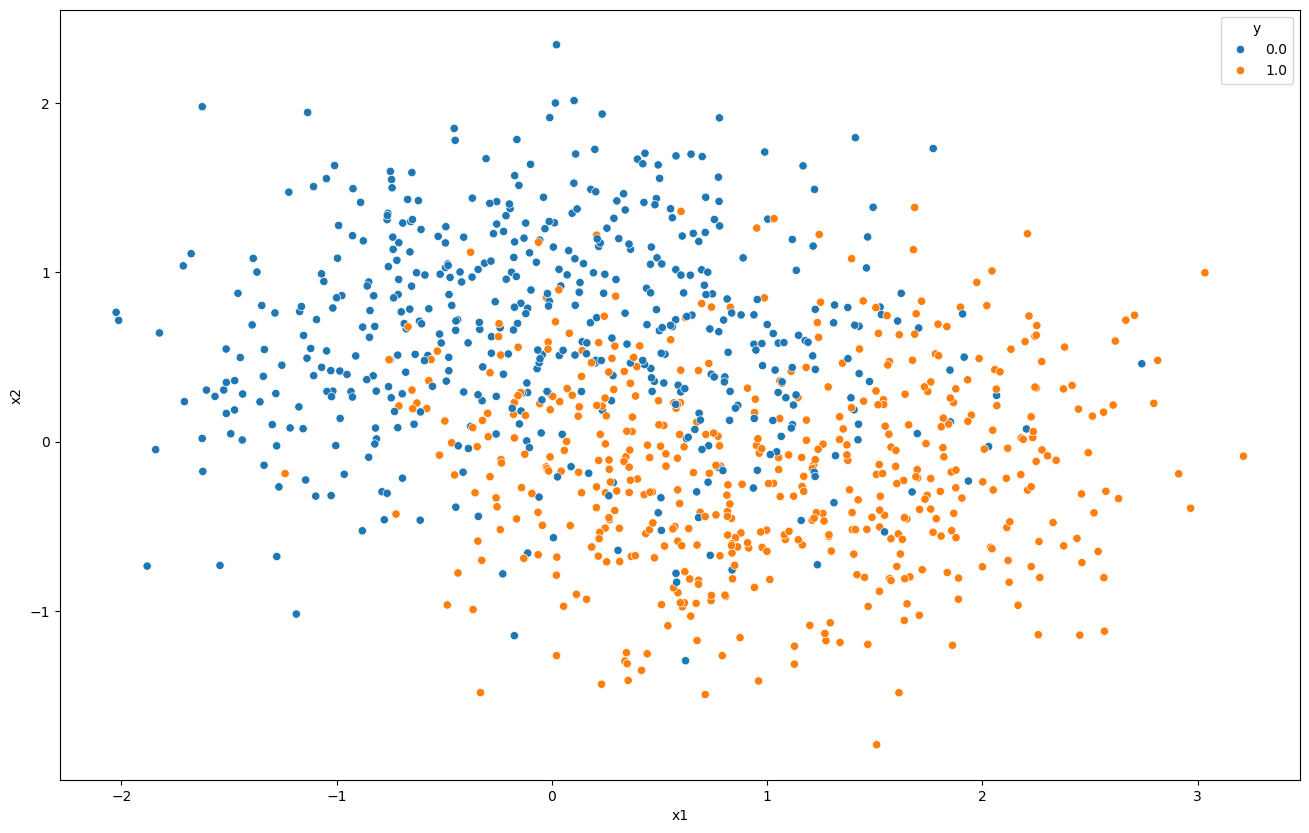

In [16]:
fig = plt.figure()
fig.set_size_inches(16,10)
sns.scatterplot(data = dataset, x = 'x1', y = 'x2', hue = 'y')
plt.show()

In [17]:
X = dataset.drop('y', axis = 1)
Y = dataset['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 0)


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate = 1,
                                  max_depth = 2,
                                  n_estimators = 500)
model

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=500)

In [19]:
model.n_estimators

500

In [26]:
def learn_boosting_and_plot(estimator = model,
                           X_tr = X_train,
                           X_ts = X_test,
                           y_tr = y_train,
                           y_ts = y_test):
    pixel_step = 0.2
    X = pd.concat((X_tr, X_ts))
    y = pd.concat((y_tr, y_ts))
    x1_min, x1_max = X.values[:, 0].min(), X.values[:, 0].max()
    x2_min, x2_max = X.values[:, 1].min(), X.values[:, 1].max()

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, pixel_step),
        np.arange(x2_min, x2_max, pixel_step)
    )

    estimator.fit(X_tr, y_tr)

    accuracy_train = estimator.score(X_tr, y_tr)
    accuracy_test = estimator.score(X_ts, y_ts)

    # Для каждой точки даем прогноз 
    Z = estimator.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    cs = plt.contourf(xx1,xx2,Z,cmap = plt.cm.Paired)
    plt.axis('tight')

    for i, n, c in zip(range(2), model.classes_, ['red', 'green']):
        idx = np.where(y == i)
        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c = c,
            s = 20,
            edgecolor = 'k',
            label = 'Class %s' %n,
        )
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.legend(loc = 'upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(f'Gradient boosting with {estimator.n_estimators} estimators')
    plt.show()
    return accuracy_train, accuracy_test

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


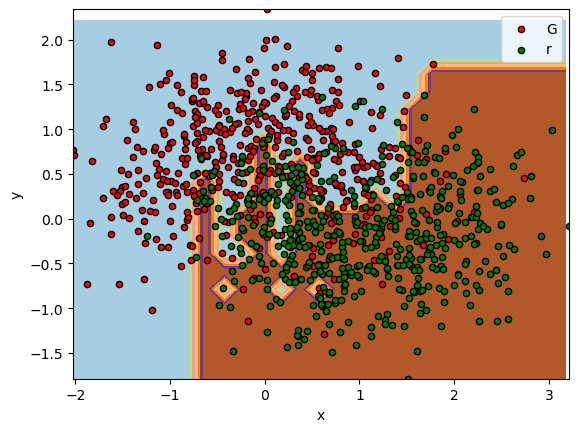

(1.0, 0.755)

In [27]:
learn_boosting_and_plot(model)

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


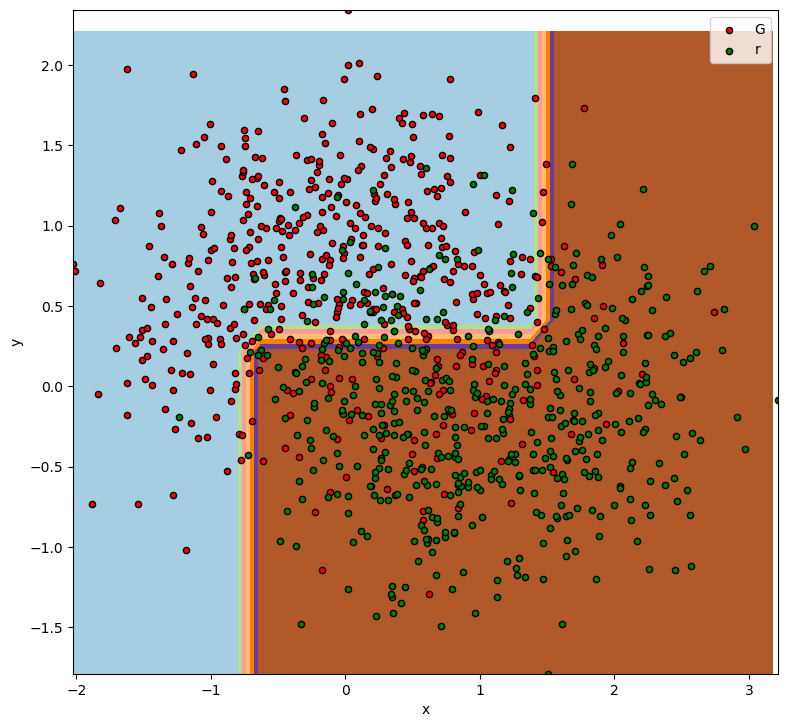

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


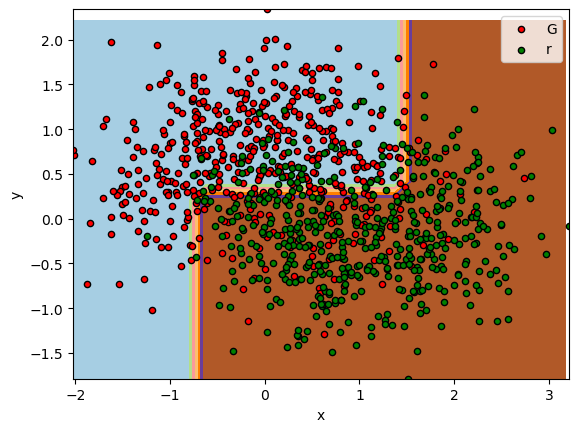

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


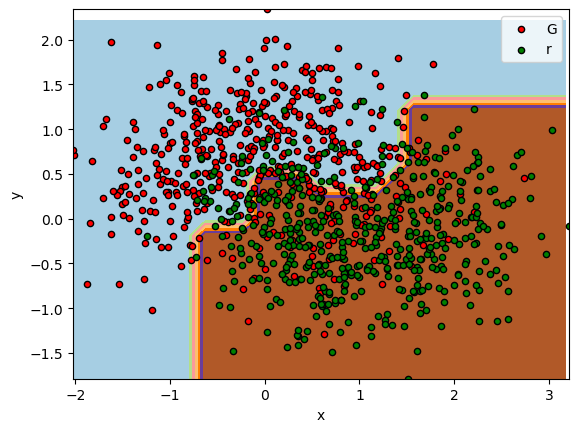

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


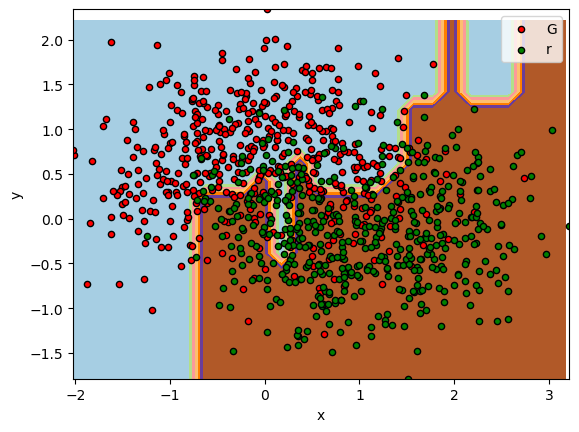

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


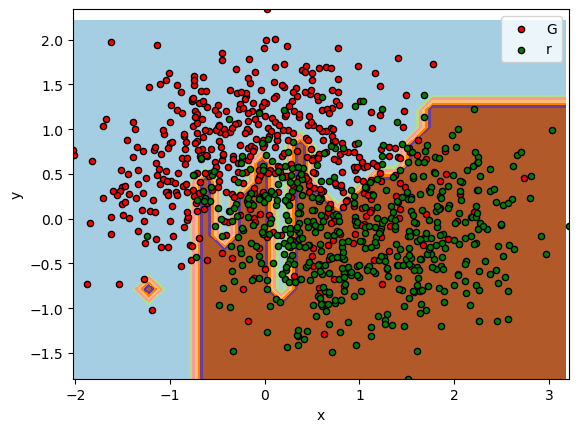

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


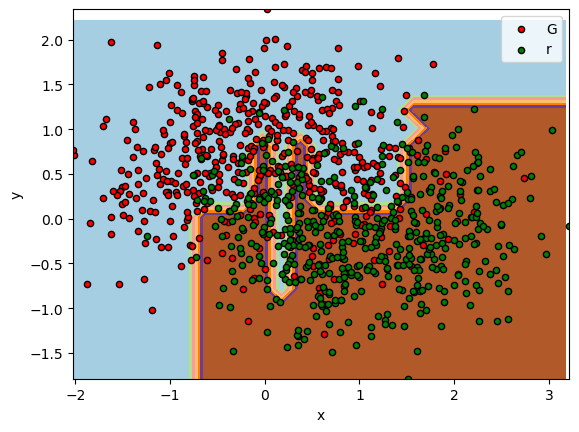

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


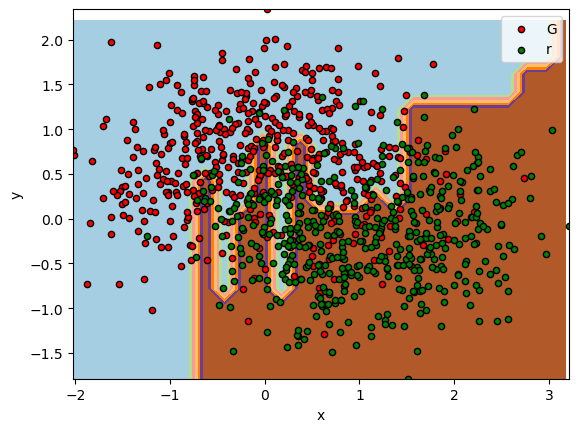

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


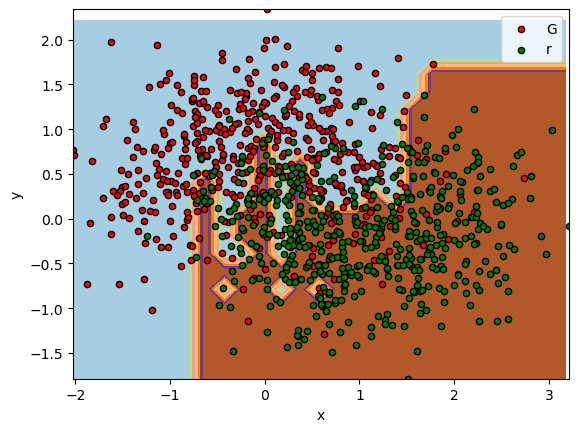

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


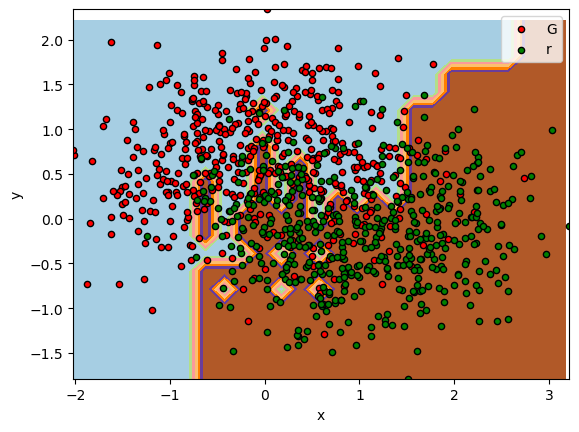

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


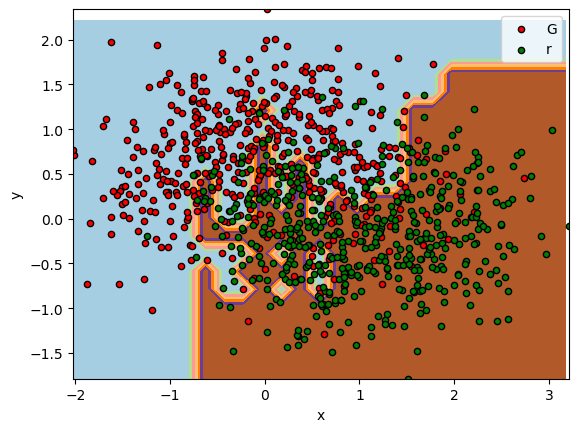

In [29]:
estimators_num = [1, 5, 10, 25, 50, 100, 200, 500, 1000, 3000]
fig = plt.figure()
fig.set_size_inches(20, 50)

train_accuracies = []
test_accuracies = []

for i, s in enumerate(estimators_num):
    model.n_estimators = s
    ax_ = fig.add_subplot(5, 2, i+1)
    outputs = learn_boosting_and_plot(model)
    train_accuracies.append(outputs[0])
    test_accuracies.append(outputs[1])

fig.tight_layout()
plt.show() 

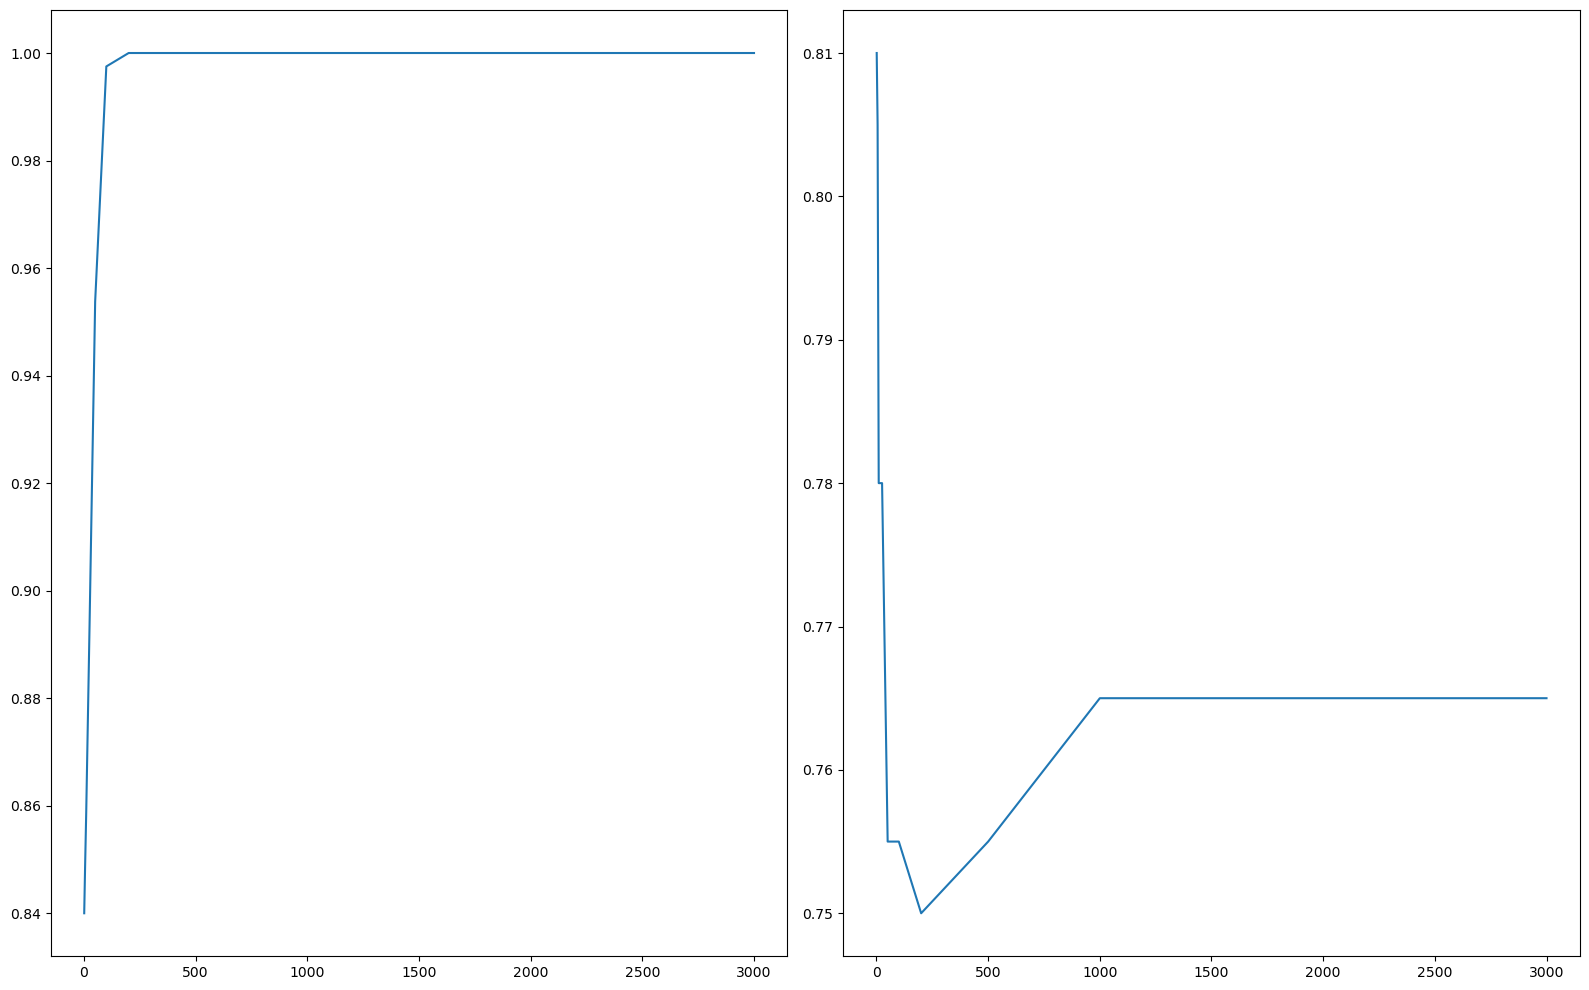

In [32]:
fig = plt.figure()
fig.set_size_inches(16,10)
ax_1 = fig.add_subplot(1,2,1)
plt.plot(estimators_num, train_accuracies)
ax_2 = fig.add_subplot(1,2,2)
plt.plot(estimators_num, test_accuracies)
plt.tight_layout()
plt.show()

In [34]:
test_accuracies

[0.81, 0.805, 0.78, 0.78, 0.755, 0.755, 0.75, 0.755, 0.765, 0.765]

In [35]:
model = GradientBoostingClassifier(learning_rate = 0.1,
                                  max_depth = 2,
                                  n_estimators = 500)
model

GradientBoostingClassifier(max_depth=2, n_estimators=500)

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


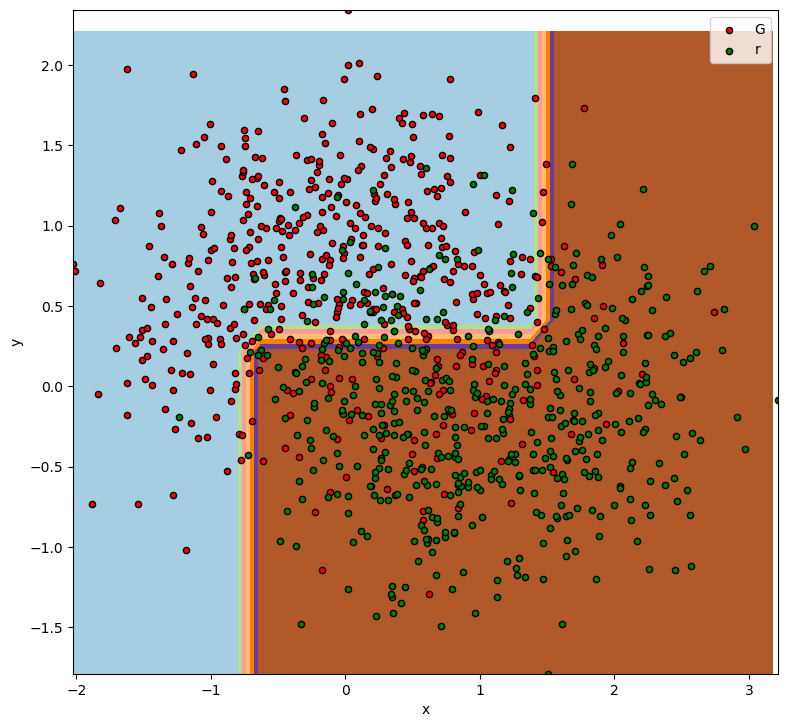

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


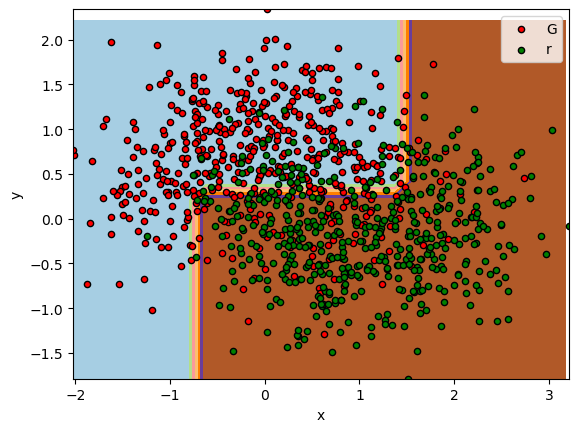

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


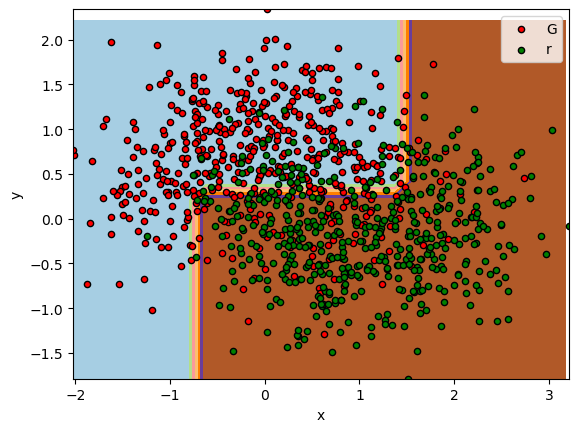

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


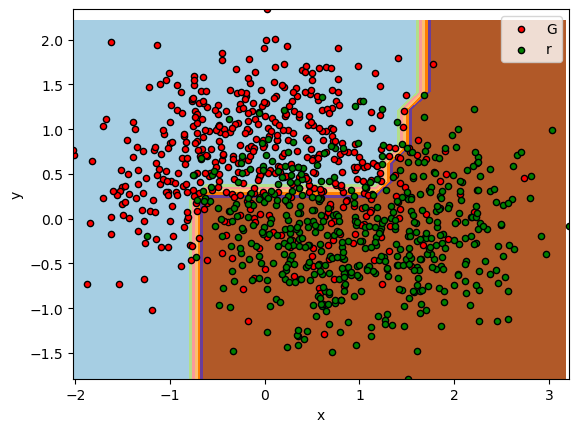

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


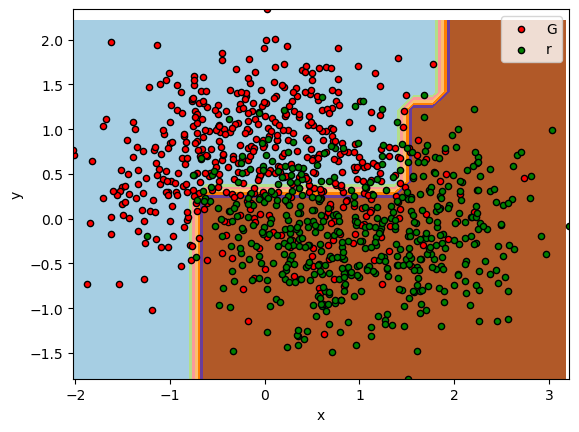

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


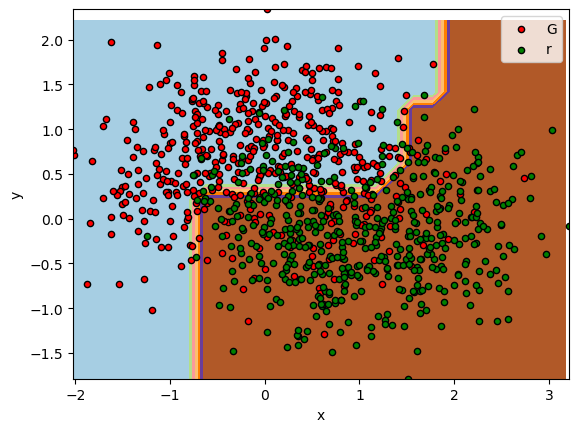

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


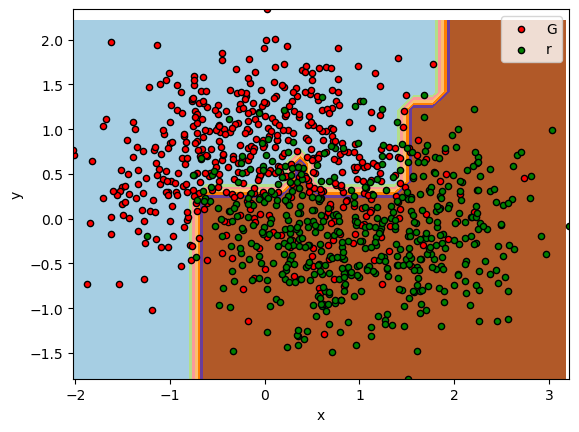

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


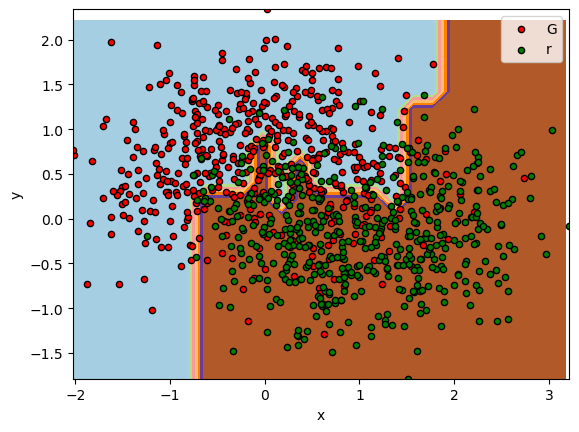

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


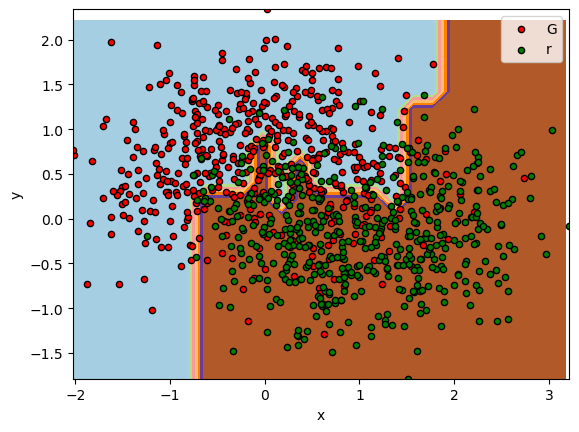

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


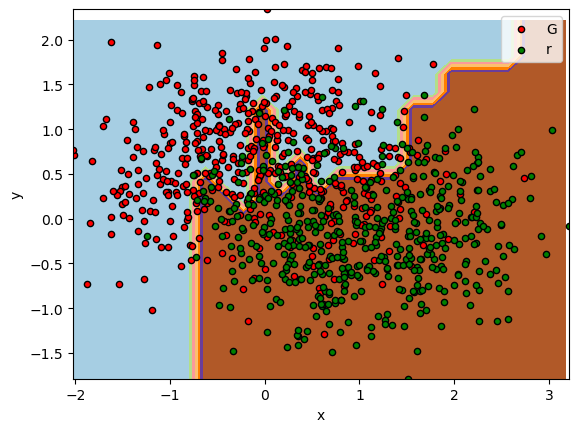

In [36]:
estimators_num = [1, 5, 10, 25, 50, 100, 200, 500, 1000, 3000]
fig = plt.figure()
fig.set_size_inches(20, 50)

train_accuracies = []
test_accuracies = []

for i, s in enumerate(estimators_num):
    model.n_estimators = s
    ax_ = fig.add_subplot(5, 2, i+1)
    outputs = learn_boosting_and_plot(model)
    train_accuracies.append(outputs[0])
    test_accuracies.append(outputs[1])

fig.tight_layout()
plt.show() 

In [37]:
print(train_accuracies)
print(test_accuracies)

[0.84, 0.84125, 0.84125, 0.84375, 0.85, 0.86125, 0.88875, 0.955, 0.9975, 1.0]
[0.81, 0.805, 0.805, 0.805, 0.8, 0.79, 0.78, 0.765, 0.755, 0.755]


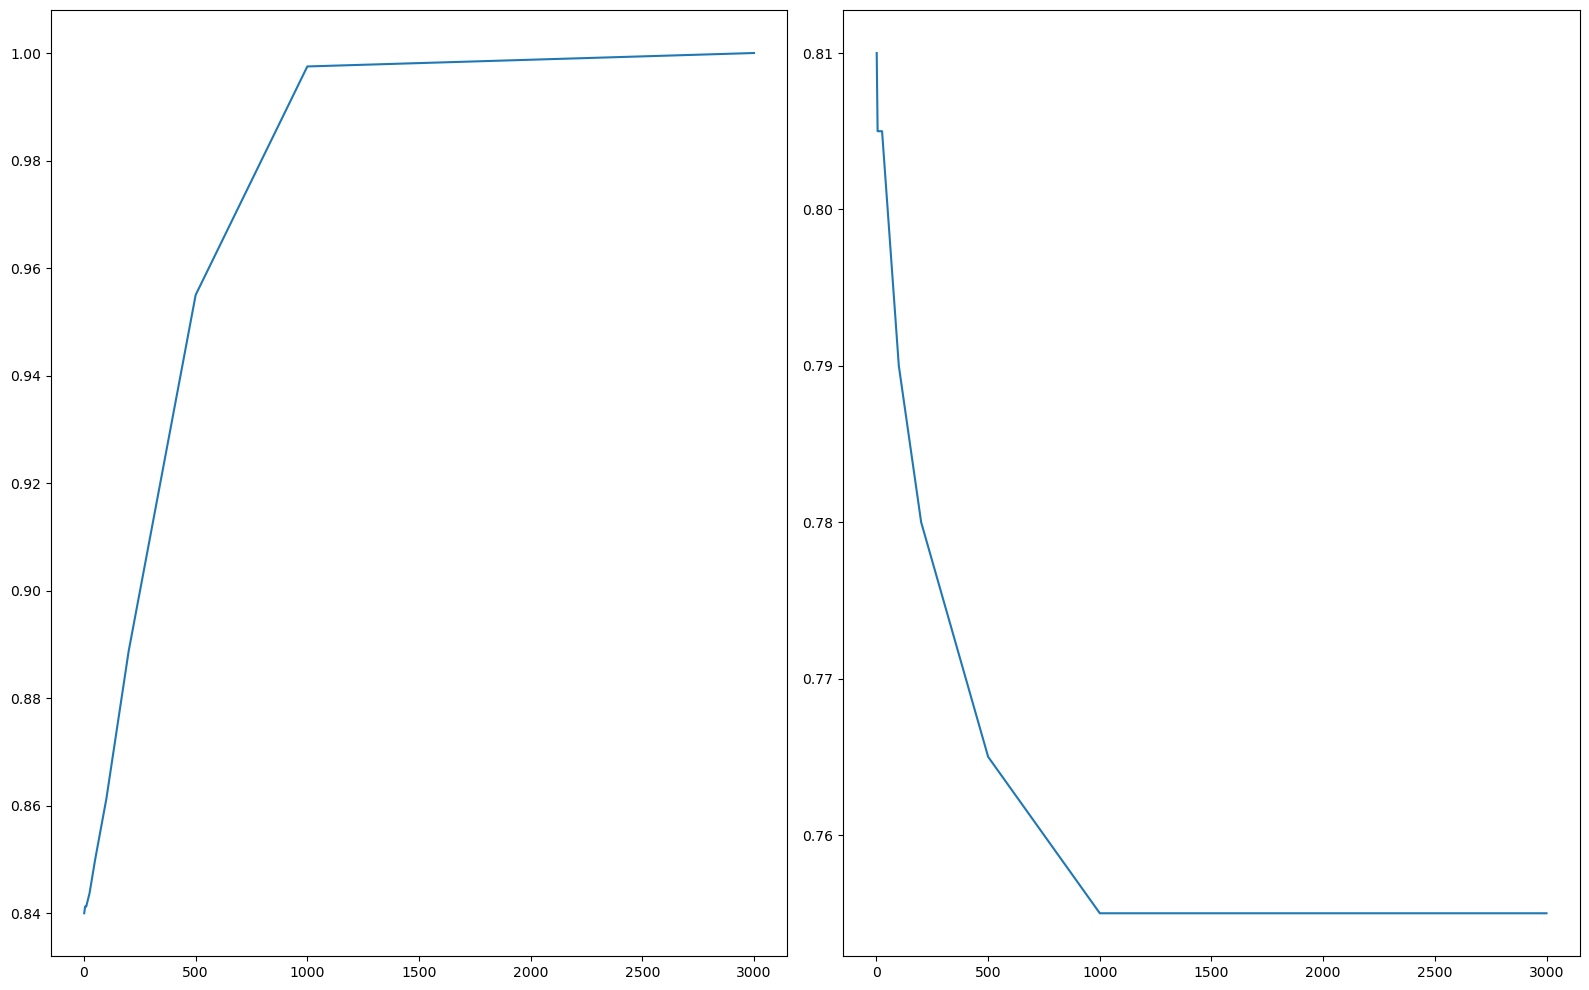

In [38]:
fig = plt.figure()
fig.set_size_inches(16,10)
ax_1 = fig.add_subplot(1,2,1)
plt.plot(estimators_num, train_accuracies)
ax_2 = fig.add_subplot(1,2,2)
plt.plot(estimators_num, test_accuracies)
plt.tight_layout()
plt.show()

In [39]:
data = pd.read_csv('cut_market_info.csv')
data

,date,store_nbr,item_nbr,unit_sales,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred
0,2016-10-26,6,1489881,6.000,1.0,2016-10,48.75,Quito,Pichincha,D,13,PRODUCE,2018,1,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
1,2014-06-02,9,953609,7.000,0.0,2014-06,103.07,Quito,Pichincha,B,6,CLEANING,3046,0,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
2,2017-06-18,21,1946155,5.000,0.0,2017-06,44.73,Santo Domingo,Santo Domingo de los Tsachilas,B,6,DELI,2650,1,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
3,2016-07-09,46,119023,6.000,0.0,2016-07,45.37,Quito,Pichincha,A,14,CLEANING,3026,0,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
4,2016-08-04,43,760319,7.707,0.0,2016-08,41.92,Esmeraldas,Esmeraldas,E,10,POULTRY,2416,1,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191917,2015-08-25,17,220432,10.000,0.0,2015-08,39.15,Quito,Pichincha,C,12,GROCERY I,1080,0,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
191918,2014-07-03,30,890375,5.000,0.0,2014-07,104.76,Guayaquil,Guayas,C,3,GROCERY I,1002,0,Holiday,Local,El Carmen,Cantonizacion de El Carmen,Holiday
191919,2014-08-13,44,795610,38.000,0.0,2014-08,97.57,Quito,Pichincha,A,5,FROZEN FOODS,2220,0,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
191920,2013-10-01,34,213788,3.000,NaN,2013-10,102.09,Guayaquil,Guayas,B,6,GROCERY I,1096,0,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay


In [41]:
X = data.drop('unit_sales', axis = 1)
y = data['unit_sales']

#msle
y = y.apply(np.log1p)

X_train, X_test = X[X['date']<'2017-06-01'], X[X['date']>='2017-06-01']
y_train, y_test = y[y.index.isin(X_train.index)], y[y.index.isin(X_test.index)]

# уберем дату

X = X.drop('date', axis = 1)
X_train = X_train.drop('date', axis = 1)
X_test = X_test.drop('date', axis = 1)

object_cols = ['store_nbr', 'item_nbr', 'onpromotion', 'month',
               'city', 'state', 'type', 'cluster', 'family',
               'class', 'perishable', 'holiday_type', 'locale',
               'locale_name', 'description', 'transferred']

X[object_cols] = X[object_cols].astype(object)
X_train[object_cols] = X_train[object_cols].astype(object)
X_test[object_cols] = X_test[object_cols].astype(object)

In [42]:
X_train[object_cols] = X_train[object_cols].astype(str)
X_test[object_cols] = X_test[object_cols].astype(str)

# Запишем колонки для трансформации
cols_for_ohe = [x for x in X_train.columns if X_train[x].nunique()<5]
cols_for_mte = [x for x in X_train.columns if X_train[x].nunique()>=5]
numeric_cols = list(X_train.select_dtypes(exclude='object').columns)


# Запишем индексы этих колонок
cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]
numeric_cols_idx = [list(X_train.columns).index(col) for col in numeric_cols]

cat_cols = cols_for_ohe_idx + cols_for_mte_idx

In [1]:
pip install --user catboost

  Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   --------

ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'C:\\Users\\jackt\\AppData\\Local\\Temp\\pip-unpack-be0sw9hn\\catboost-1.2.8-cp313-cp313-win_amd64.whl'
Check the permissions.



In [44]:
from catboost import CatBoostRegressor

ModuleNotFoundError: No module named 'catboost'

In [ ]:
# На кэгле